# 关于EfficentNet网络

## EfficientNet作者、论文与源代码

1. 官方代码
    - EfficientNet是Google在2019年提出的一种神经网络，其官方地址在： （实现框架自然是Tensorflow）
        - `https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet`

2. 论文地址：
    - `https://arxiv.org/abs/1905.11946`

3. 作者：
    - `Mingxing Tan`, `Quoc V. Le`
    - 作者在github的主页：
        - `https://github.com/mingxingtan/efficientnet`

## 关于EfficientNet网络的应用

1. 垃圾分类的案例
    - 华为垃圾分类挑战杯

2. 案例地址：
    - `https://github.com/wusaifei/garbage_classify`

3. 数据集下载：
    - `https://modelarts-competitions.obs.cn-north-1.myhuaweicloud.com/garbage_classify/dataset/garbage_classify.zip`

4. 分类效果与算法比对：
    1. ResNet50
        - 0.689704，
    2. SE-ResNet50
        - 0.83259，
    3. Xception
        - 0.879003，
    4. EfficientNetB5
        - 0.924113（无数据增强）
        - 0.934721（数据增强）

## PyTorch实现与安装

1. PyTorch实现地址：
    - `https://github.com/lukemelas/EfficientNet-PyTorch`

2. 安装指令：
    - `>pip install efficientnet_pytorch`

# 在华为垃圾分类数据上个的训练测试应用

## 数据集准备

- 数据集存放在当前ipynb文件路径的datasets/garbage目录下，一共40类垃圾。

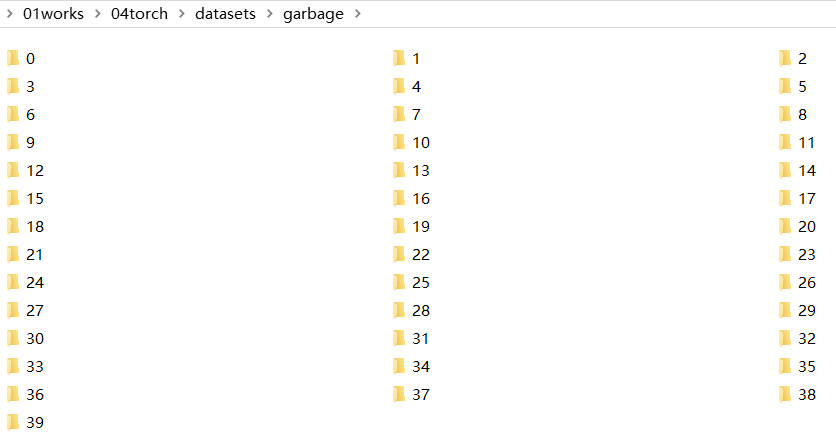

## 类别说明文件

- 在datasets下有一个json文件就是类别说明文件，说明的是每个目录对应的垃圾分类名:
    - `garbage_classify_rule.json`

- 垃圾类别如下列表：

```javascript
{
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}
```

-  实现测试中，我们不使用这个文件，但是可以用来人工验证测试的正确性。

## 文档帮助说明

### 模块结构

In [1]:
import efficientnet_pytorch
help(efficientnet_pytorch)

Help on package efficientnet_pytorch:

NAME
    efficientnet_pytorch

PACKAGE CONTENTS
    model
    utils

VERSION
    0.6.3

FILE
    c:\program files\python36\lib\site-packages\efficientnet_pytorch\__init__.py




- 包`efficientnet_pytorch`路径下两个模块：
    - model.py
        - 核心类：EfficientNet
            - 块：MBConvBlock
        
    - utils.py
        - 提供了swish函数等实现。

- swish函数公式：
    - $f(x) = x · \text{sigmoid}(βx)$
    - 介于线性函数与ReLU函数

In [2]:
import efficientnet_pytorch.model
# help(efficientnet_pytorch.model)   # 需要时可以在线查阅帮助
efficientnet_pytorch.model?

Type:        module
String form: <module 'efficientnet_pytorch.model' from 'c:\\program files\\python36\\lib\\site-packages\\efficientnet_pytorch\\model.py'>
File:        c:\program files\python36\lib\site-packages\efficientnet_pytorch\model.py
Docstring:   <no docstring>


### EfficientNet类说明

In [3]:
from efficientnet_pytorch.model import EfficientNet
# help(EfficientNet)   # 帮助长，需要就可以查看
EfficientNet?

Init signature: EfficientNet(blocks_args=None, global_params=None)
Docstring:     
An EfficientNet model. Most easily loaded with the .from_name or .from_pretrained methods

Args:
    blocks_args (list): A list of BlockArgs to construct blocks
    global_params (namedtuple): A set of GlobalParams shared between blocks

Example:
    model = EfficientNet.from_pretrained('efficientnet-b0')
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File:           c:\program files\python36\lib\site-packages\efficientnet_pytorch\model.py
Type:           type
Subclasses:     


## 训练测试

- 训练测试我们把数据集的加载与预处理在一起实现。

### 数据集加载与预处理

- 数据集的两个参数：
    - 切分训练集与测试集的比例：rate
    - 训练数据集的批次：batch_size

In [4]:
batch_size = 24
rate = 0.8

- 数据预处理沿袭了pytorch中的归一化参数，这参数是根据ImageNet2012数据集计算得到的。

In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, Compose, ToTensor, Normalize, RandomHorizontalFlip, RandomVerticalFlip, RandomResizedCrop
from torch.utils.data import random_split, DataLoader
import torch
# 预处理变换
transform = Compose(
    [
        RandomResizedCrop((240, 240)),          #RandomResizedCrop(227),
        RandomHorizontalFlip(),
        RandomVerticalFlip(),
        ToTensor(),
        Normalize(mean=[0.56719673, 0.5293289, 0.48351972], std=[0.20874391, 0.21455203, 0.22451781]),
    ]
)
ds = ImageFolder("./datasets/garbage", transform=transform)

l = len(ds)
l_train = int(l * rate)
train, test = random_split(ds, [l_train, l - l_train])

train_loader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=batch_size)   
test_loader = torch.utils.data.DataLoader(dataset=test, shuffle=False, batch_size=batch_size) 

### 构建EfficientNet需要的参数

- EfficientNet网络需要两个参数，每个参数的字段说明可以从命名获取。
    1. 全局参数
    2. 块参数

- 参数的产生与过程示意图如下：

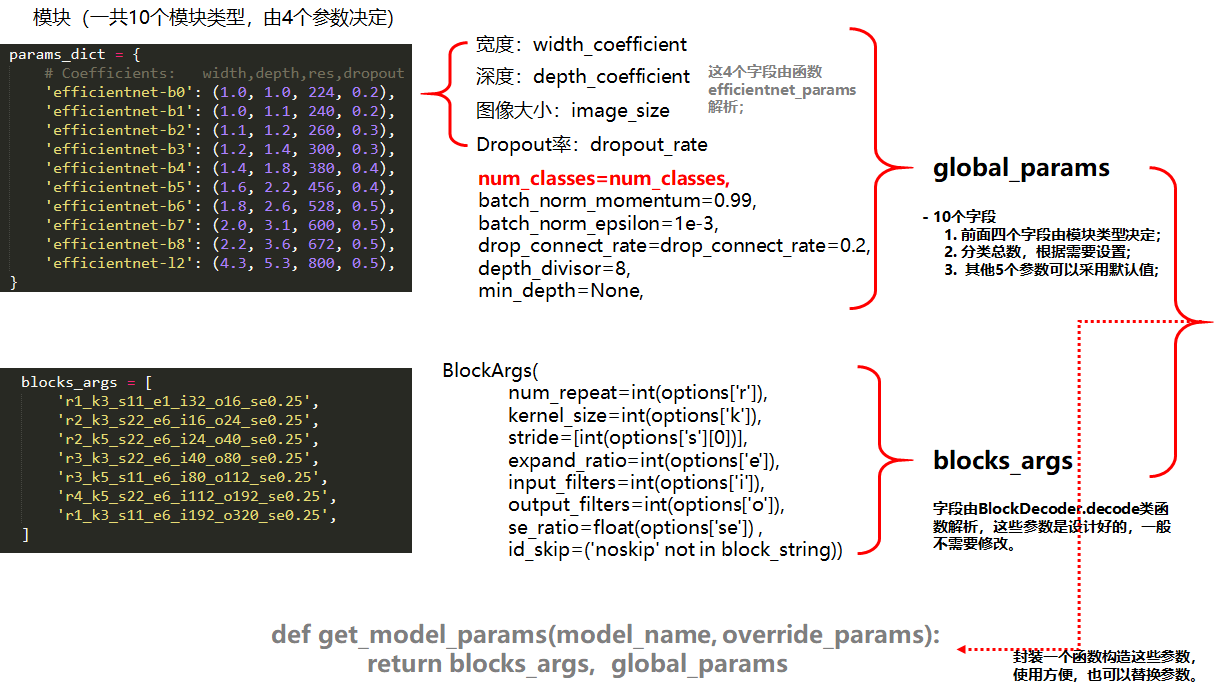

1. 全局参数定义

```python
GlobalParams = collections.namedtuple('GlobalParams', [
    'width_coefficient', 'depth_coefficient', 'image_size', 'dropout_rate',
    'num_classes', 'batch_norm_momentum', 'batch_norm_epsilon',
    'drop_connect_rate', 'depth_divisor', 'min_depth'])
```

2. 块参数定义

```python
BlockArgs = collections.namedtuple('BlockArgs', [
    'num_repeat', 'kernel_size', 'stride', 'expand_ratio',
    'input_filters', 'output_filters', 'se_ratio', 'id_skip'])
```

3. 块参数使用字符串描述方式，并提供了各种不同的网络块的描述：
    - 字符串含义描述：
        - (r)-num_repeat
        - (k)-kernel_size
        - (s)-stride
        - (e)-expand_ratio
        - (i)-input_filters
        - (o)-output_filters
        - (se)- se_ratio
    - 所有块的描述：
        - 'r1_k3_s11_e1_i32_o16_se0.25',
        - 'r2_k3_s22_e6_i16_o24_se0.25',
        - 'r2_k5_s22_e6_i24_o40_se0.25',
        - 'r3_k3_s22_e6_i40_o80_se0.25',
        - 'r3_k5_s11_e6_i80_o112_se0.25',
        - 'r4_k5_s22_e6_i112_o192_se0.25',
        - 'r1_k3_s11_e6_i192_o320_se0.25',

4. 模块类型及其主要参数

```python
    params_dict = {
        # Coefficients:   width,depth,res,dropout
        'efficientnet-b0': (1.0, 1.0, 224, 0.2),
        'efficientnet-b1': (1.0, 1.1, 240, 0.2),
        'efficientnet-b2': (1.1, 1.2, 260, 0.3),
        'efficientnet-b3': (1.2, 1.4, 300, 0.3),
        'efficientnet-b4': (1.4, 1.8, 380, 0.4),
        'efficientnet-b5': (1.6, 2.2, 456, 0.4),
        'efficientnet-b6': (1.8, 2.6, 528, 0.5),
        'efficientnet-b7': (2.0, 3.1, 600, 0.5),
        'efficientnet-b8': (2.2, 3.6, 672, 0.5),
        'efficientnet-l2': (4.3, 5.3, 800, 0.5),
    }
```

5. 模块的其他参数，这些参数一般不需要经常调整。
    - 前面4个参数就上面模块类型中解析得到。

```python
    global_params = GlobalParams(
        width_coefficient=width_coefficient,   
        depth_coefficient=depth_coefficient,
        image_size=image_size,
        dropout_rate=dropout_rate,

        num_classes=num_classes,
        batch_norm_momentum=0.99,
        batch_norm_epsilon=1e-3,
        drop_connect_rate=drop_connect_rate,
        depth_divisor=8,
        min_depth=None,
    )
```

6. EfficientNet的参数可以一个函数得到（这个函数在utils的工具模块中实现的，）
    - 参数model_name指定模块类型，垃圾分类识别一般使用EfficientNet-b5可以到达0.924113的正确率。
        1. 'efficientnet-b0': (1.0, 1.0, 224, 0.2),
        2. 'efficientnet-b1': (1.0, 1.1, 240, 0.2),
        3. 'efficientnet-b2': (1.1, 1.2, 260, 0.3),
        4. 'efficientnet-b3': (1.2, 1.4, 300, 0.3),
        5. 'efficientnet-b4': (1.4, 1.8, 380, 0.4),
        6. 'efficientnet-b5': (1.6, 2.2, 456, 0.4),
        7. 'efficientnet-b6': (1.8, 2.6, 528, 0.5),
        8. 'efficientnet-b7': (2.0, 3.1, 600, 0.5),
        9. 'efficientnet-b8': (2.2, 3.6, 672, 0.5),
        10. 'efficientnet-l2': (4.3, 5.3, 800, 0.5),
    - 参数override_params指定需要定制指定的global_params中的字段，这个参数是变长参数列表。指定的字段必须包含在global_params中，否则报异常。
        - 这个参数一般建议修改其中的**num_classes**即可。
        

```python
def get_model_params(model_name, override_params):
    ......
    
    return blocks_args, global_params
    
```

### 迭代训练

- 我们选择的模型是：efficientnet-b1，这样图像的预先处理就应该是240大小.
    - 说明：我的电脑跑其他模型跑不动！

- 训练过程中的几个参数：
    - 轮数：epoch
    - 学习率：lr
    - 类别数：num_classes
    - 数据集(训练集与测试集):ds_tr, ds_ts

In [6]:
epoch = 100  # 尽管我们这里设置了，但是后面没有使用，而是使用的默认值400.
lr = 0.0001
num_classes = 40 

- 把训练过程先封装成一个类
    - 训练执行
    - 验证

In [7]:
import torch
from efficientnet_pytorch.model import EfficientNet
from efficientnet_pytorch.utils import get_model_params
import os

class EfficientNetTrainer:
    def __init__(self, ds_tr, ds_ts, num_classes=40, epoch=400, lr=0.0001):
        super(EfficientNetTrainer, self).__init__()
        print("训练准备......")
        self.module_file = "./datasets/efficientnet.mod"
        # 训练相关的初始化
        self.CUDA = torch.cuda.is_available()
        # 1. 数据集
        self.tr, self.ts = ds_tr, ds_ts

        # 2. 网络(num_classes=40参数用来覆盖原来的默认值num_classes=1000)
        self.blocks_args, self.global_params = get_model_params("efficientnet-b1", override_params={"num_classes":num_classes,})
        self.net = EfficientNet(self.blocks_args, self.global_params)
        
        if self.CUDA:
            self.net.cuda()
        if os.path.exists(self.module_file):
            state = torch.load(self.module_file)  
            self.net.load_state_dict(state)
        
        self.epoch = epoch
        self.lr = lr
        # 4. 优化器
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=self.lr)
        # 5. 损失函数
        self.loss_function = torch.nn.CrossEntropyLoss()
        if self.CUDA:
            self.loss_function = self.loss_function.cuda()

    def execute(self):
        # 保存的频率
        save_epoch = 1
        # 轮数迭代
        print("训练开始......")
        for e in range(self.epoch):
            self.net.train()
            for samples, labels in self.tr:
                self.optimizer.zero_grad()
                if self.CUDA:
                    samples = samples.cuda()
                    labels = labels.cuda()
                # 计算输出
                y = self.net(samples.view(-1, 3, 240, 240))
                # 计算损失
                loss = self.loss_function(y, labels)
                # 求导
                loss.backward()
                # 更新梯度
                self.optimizer.step()
            

            # 使用验证数据集验证
            correct_rate = self.validate()
            print(f"轮数：{e + 1 : 03d}， \t识别正确率:{correct_rate : 5.4f}%, \t损失值：{loss : 8.6f}")
        
            # 根据一定的save_epoch周期保存模型
            if (e + 1) % save_epoch == 0:
                torch.save(self.net.state_dict(), self.module_file)  # GPU保存

            # # 使用验证数据集验证
            # correct_rate = self.validate()
            # print(f"轮数：{e + 1 : 03d}: \t识别正确率:{correct_rate : 5.4f}%, \t损失值：{loss : 8.6f}")
        
        # 训练结束，保存模型
        torch.save(self.net.state_dict(), self.module_file)  # GPU保存
    
    @torch.no_grad()
    def validate(self):
        num_samples = 0.0    # 累加测试样本
        num_correct = 0.0
        self.net.eval()   # 禁用Batch_Norm与Dropout
        for samples, labels in self.ts:
            if self.CUDA:
                samples = samples.cuda()
                labels = labels.cuda()
            # 累计验证数据集总数
            num_samples += len(samples)
            # 计算输出
            out = self.net(samples.view(-1, 3, 240, 240))
            # 转换为概率形式[0, 1)
            out =torch.nn.functional.softmax(out, dim=1)
            # 输出预测类别
            y = torch.argmax(out, dim=1)
            # 计算预测正确的个数
            num_correct += (y == labels).float().sum()
            # print(F"{y}->{labels} = {(y==labels)}")
            # 返回准确率
        return  num_correct * 100.0 / num_samples


In [8]:
trainer = EfficientNetTrainer(ds_tr=train_loader, ds_ts=test_loader)
# 调用训练函数
trainer.execute()

训练准备......
训练开始......
轮数： 01， 	识别正确率: 43.7269%, 	损失值： 1.848979
轮数： 02， 	识别正确率: 45.1239%, 	损失值： 3.315353
轮数： 03， 	识别正确率: 46.0200%, 	损失值： 1.355079
轮数： 04， 	识别正确率: 45.8355%, 	损失值： 3.115182
轮数： 05， 	识别正确率: 45.2293%, 	损失值： 2.015982
轮数： 06， 	识别正确率: 46.3890%, 	损失值： 2.246075
轮数： 07， 	识别正确率: 47.9178%, 	损失值： 2.893875
轮数： 08， 	识别正确率: 48.6821%, 	损失值： 1.971927
轮数： 09， 	识别正确率: 47.1270%, 	损失值： 2.266154
轮数： 10， 	识别正确率: 49.7364%, 	损失值： 2.891886
轮数： 11， 	识别正确率: 47.5751%, 	损失值： 2.773519
轮数： 12， 	识别正确率: 49.5519%, 	损失值： 2.661773
轮数： 13， 	识别正确率: 49.2356%, 	损失值： 1.868792
轮数： 14， 	识别正确率: 50.8171%, 	损失值： 3.547399
轮数： 15， 	识别正确率: 50.7907%, 	损失值： 0.607720
轮数： 16， 	识别正确率: 51.6605%, 	损失值： 2.344203
轮数： 17， 	识别正确率: 52.2667%, 	损失值： 1.731142
轮数： 18， 	识别正确率: 54.0063%, 	损失值： 2.006582
轮数： 19， 	识别正确率: 53.6110%, 	损失值： 1.698146
轮数： 20， 	识别正确率: 53.6900%, 	损失值： 1.096942
轮数： 21， 	识别正确率: 53.4265%, 	损失值： 1.981369
轮数： 22， 	识别正确率: 52.9784%, 	损失值： 2.980216
轮数： 23， 	识别正确率: 54.5862%, 	损失值： 1.679068
轮数： 24， 	识别正确率: 54.8234%, 	损失值： 1.7

## EffficentNet在ImageNet数据集上的效果

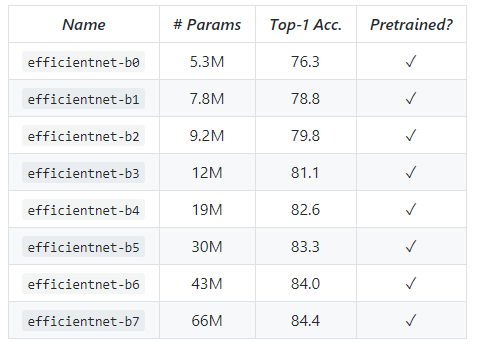

## 更加方便的EfficientNet模型构建方式

1. 初始模型构建
    - `from_name(model_name, override_params=None)`
        - 可以使用`override_params = {"num_classes": 1000,.....}`覆盖参数，比如分类类型数。

```python
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_name('efficientnet-b0')
```

2. 预训练模型构建
    - `from_pretrained(model_name, advprop=False, num_classes=1000, in_channels=3)`

```python
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')
```

## 使用EfficientNet做特征抽取

# EfficientNet网络理解与实现